# Crime Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Unemployment Data

Insert Data from the Excel File

## Per Borough

In [2]:
unemployed = pd.read_excel('./data/Unemployment_NYC.xlsx',sheet_name=0)

In [3]:
# converting headers to lowercase and removing whitespaces:
unemployed.columns = unemployed.columns.str.lower()
unemployed.columns = unemployed.columns.str.strip()

In [4]:
unemployed.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
0,County,Albany County,2024,1,158900,153000,6000,3.8
1,County,Albany County,2024,2,159300,153200,6100,3.8
2,County,Albany County,2024,3,158700,152900,5800,3.6
3,County,Albany County,2023,0,160600,155300,5300,3.3
4,County,Albany County,2023,1,157700,152200,5400,3.5


In [5]:
unemployed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27590 entries, 0 to 27589
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areatype    27590 non-null  object 
 1   area        27590 non-null  object 
 2   year        27590 non-null  int64  
 3   month       27590 non-null  int64  
 4   laborforce  27590 non-null  int64  
 5   emp         27590 non-null  int64  
 6   unemp       27590 non-null  int64  
 7   unemprate   27590 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.7+ MB


### Filter the data
for the 5 boroughs: Bronx, Kings, New York, Queens, Richmond are the official names for the boroughs

In [6]:
unemployed['areatype'].unique()

array(['County'], dtype=object)

In [7]:
unemployed['area'].unique()

array(['Albany County', 'Allegany County', 'Bronx County',
       'Broome County', 'Cattaraugus County', 'Cayuga County',
       'Chautauqua County', 'Chemung County', 'Chenango County',
       'Clinton County', 'Columbia County', 'Cortland County',
       'Delaware County', 'Dutchess County', 'Erie County',
       'Essex County', 'Franklin County', 'Fulton County',
       'Genesee County', 'Greene County', 'Hamilton County',
       'Herkimer County', 'Jefferson County', 'Kings County',
       'Lewis County', 'Livingston County', 'Madison County',
       'Monroe County', 'Montgomery County', 'Nassau County',
       'New York County', 'Niagara County', 'Oneida County',
       'Onondaga County', 'Ontario County', 'Orange County',
       'Orleans County', 'Oswego County', 'Otsego County',
       'Putnam County', 'Queens County', 'Rensselaer County',
       'Richmond County', 'Rockland County', 'Saratoga County',
       'Schenectady County', 'Schoharie County', 'Schuyler County',
       'S

In [8]:
borough = ['Bronx County', 'Kings County', 'New York County', 'Queens County', 'Richmond County']
borough_unem = unemployed.loc[unemployed['area'].isin(borough)]
borough_unem.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
890,County,Bronx County,2024,1,603800,567500,36300,6.0
891,County,Bronx County,2024,2,611800,573800,38000,6.2
892,County,Bronx County,2024,3,613000,577900,35100,5.7
893,County,Bronx County,2023,0,607900,566400,41500,6.8
894,County,Bronx County,2023,1,607200,561500,45700,7.5


In [9]:
borough_unem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2225 entries, 890 to 19134
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areatype    2225 non-null   object 
 1   area        2225 non-null   object 
 2   year        2225 non-null   int64  
 3   month       2225 non-null   int64  
 4   laborforce  2225 non-null   int64  
 5   emp         2225 non-null   int64  
 6   unemp       2225 non-null   int64  
 7   unemprate   2225 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 156.4+ KB


In [10]:
borough_unem['avg_year']= borough_unem['month']==0
borough_unem.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1109/3479947575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_unem['avg_year']= borough_unem['month']==0


,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year
890,County,Bronx County,2024,1,603800,567500,36300,6.0,False
891,County,Bronx County,2024,2,611800,573800,38000,6.2,False
892,County,Bronx County,2024,3,613000,577900,35100,5.7,False
893,County,Bronx County,2023,0,607900,566400,41500,6.8,True
894,County,Bronx County,2023,1,607200,561500,45700,7.5,False


In [11]:
borough_unem['avg_year'].unique()

array([False,  True])

### Creating df with only avg yearly and with only monthly data.

In [12]:
bo_unem_yearly = borough_unem.loc[borough_unem['avg_year'] == True]
bo_unem_yearly.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year
893,County,Bronx County,2023,0,607900,566400,41500,6.8,True
906,County,Bronx County,2022,0,603400,555800,47600,7.9,True
919,County,Bronx County,2021,0,614100,529000,85200,13.9,True
932,County,Bronx County,2020,0,613100,514900,98200,16.0,True
945,County,Bronx County,2019,0,624300,590700,33600,5.4,True


In [13]:
bo_unem_yearly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 893 to 19122
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areatype    170 non-null    object 
 1   area        170 non-null    object 
 2   year        170 non-null    int64  
 3   month       170 non-null    int64  
 4   laborforce  170 non-null    int64  
 5   emp         170 non-null    int64  
 6   unemp       170 non-null    int64  
 7   unemprate   170 non-null    float64
 8   avg_year    170 non-null    bool   
dtypes: bool(1), float64(1), int64(5), object(2)
memory usage: 12.1+ KB


In [14]:
bo_unem_monthly = borough_unem.loc[borough_unem['avg_year'] == False]
bo_unem_monthly.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year
890,County,Bronx County,2024,1,603800,567500,36300,6.0,False
891,County,Bronx County,2024,2,611800,573800,38000,6.2,False
892,County,Bronx County,2024,3,613000,577900,35100,5.7,False
894,County,Bronx County,2023,1,607200,561500,45700,7.5,False
895,County,Bronx County,2023,2,612800,566900,45900,7.5,False


In [15]:
# Resetting Index:
bo_unem_yearly.reset_index(inplace=True)
bo_unem_yearly.drop('index', axis=1, inplace=True)
bo_unem_yearly.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1109/1492983441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo_unem_yearly.drop('index', axis=1, inplace=True)


,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year
0,County,Bronx County,2023,0,607900,566400,41500,6.8,True
1,County,Bronx County,2022,0,603400,555800,47600,7.9,True
2,County,Bronx County,2021,0,614100,529000,85200,13.9,True
3,County,Bronx County,2020,0,613100,514900,98200,16.0,True
4,County,Bronx County,2019,0,624300,590700,33600,5.4,True


In [16]:
# Resetting Index monthly:
bo_unem_monthly.reset_index(inplace=True)
bo_unem_monthly.drop('index', axis=1, inplace=True)
bo_unem_monthly.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1109/1102766289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo_unem_monthly.drop('index', axis=1, inplace=True)


,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year
0,County,Bronx County,2024,1,603800,567500,36300,6.0,False
1,County,Bronx County,2024,2,611800,573800,38000,6.2,False
2,County,Bronx County,2024,3,613000,577900,35100,5.7,False
3,County,Bronx County,2023,1,607200,561500,45700,7.5,False
4,County,Bronx County,2023,2,612800,566900,45900,7.5,False


In [17]:
bo_unem_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areatype    2055 non-null   object 
 1   area        2055 non-null   object 
 2   year        2055 non-null   int64  
 3   month       2055 non-null   int64  
 4   laborforce  2055 non-null   int64  
 5   emp         2055 non-null   int64  
 6   unemp       2055 non-null   int64  
 7   unemprate   2055 non-null   float64
 8   avg_year    2055 non-null   bool   
dtypes: bool(1), float64(1), int64(5), object(2)
memory usage: 130.6+ KB


In [18]:
#Including new column (day) to convert to datetime
bo_unem_monthly_d = bo_unem_monthly
bo_unem_monthly_d['day'] = 1
bo_unem_monthly_d.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1109/175291579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo_unem_monthly_d['day'] = 1


,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year,day
0,County,Bronx County,2024,1,603800,567500,36300,6.0,False,1
1,County,Bronx County,2024,2,611800,573800,38000,6.2,False,1
2,County,Bronx County,2024,3,613000,577900,35100,5.7,False,1
3,County,Bronx County,2023,1,607200,561500,45700,7.5,False,1
4,County,Bronx County,2023,2,612800,566900,45900,7.5,False,1


In [19]:
#Inserting Date
bo_unem_monthly_d['date'] = pd.to_datetime(bo_unem_monthly[['year', 'month', 'day']], format="%y/%m")
bo_unem_monthly_d.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1109/777784225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo_unem_monthly_d['date'] = pd.to_datetime(bo_unem_monthly[['year', 'month', 'day']], format="%y/%m")


,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year,day,date
0,County,Bronx County,2024,1,603800,567500,36300,6.0,False,1,2024-01-01
1,County,Bronx County,2024,2,611800,573800,38000,6.2,False,1,2024-02-01
2,County,Bronx County,2024,3,613000,577900,35100,5.7,False,1,2024-03-01
3,County,Bronx County,2023,1,607200,561500,45700,7.5,False,1,2023-01-01
4,County,Bronx County,2023,2,612800,566900,45900,7.5,False,1,2023-02-01


In [20]:
# dropping columns we don't need
bo_unem_monthly_d.drop(['areatype', 'avg_year', 'day'], axis= 1, inplace = True)
bo_unem_monthly_d.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1109/3973329206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo_unem_monthly_d.drop(['areatype', 'avg_year', 'day'], axis= 1, inplace = True)


,area,year,month,laborforce,emp,unemp,unemprate,date
0,Bronx County,2024,1,603800,567500,36300,6.0,2024-01-01
1,Bronx County,2024,2,611800,573800,38000,6.2,2024-02-01
2,Bronx County,2024,3,613000,577900,35100,5.7,2024-03-01
3,Bronx County,2023,1,607200,561500,45700,7.5,2023-01-01
4,Bronx County,2023,2,612800,566900,45900,7.5,2023-02-01


In [21]:
bo_unem_monthly_d.head()

,area,year,month,laborforce,emp,unemp,unemprate,date
0,Bronx County,2024,1,603800,567500,36300,6.0,2024-01-01
1,Bronx County,2024,2,611800,573800,38000,6.2,2024-02-01
2,Bronx County,2024,3,613000,577900,35100,5.7,2024-03-01
3,Bronx County,2023,1,607200,561500,45700,7.5,2023-01-01
4,Bronx County,2023,2,612800,566900,45900,7.5,2023-02-01


In [22]:
bo_unem_monthly_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   area        2055 non-null   object        
 1   year        2055 non-null   int64         
 2   month       2055 non-null   int64         
 3   laborforce  2055 non-null   int64         
 4   emp         2055 non-null   int64         
 5   unemp       2055 non-null   int64         
 6   unemprate   2055 non-null   float64       
 7   date        2055 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 128.6+ KB


### Looking at the Data

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


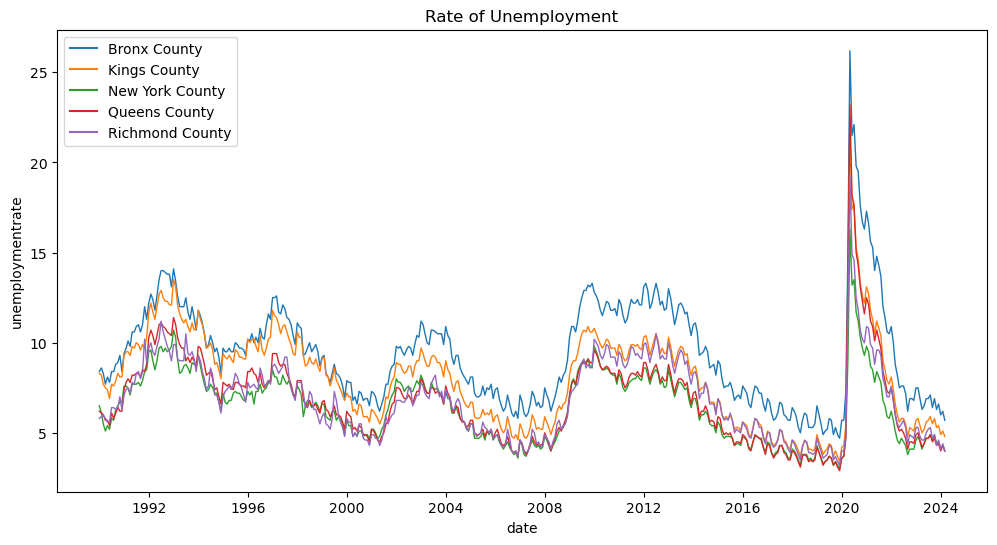

In [23]:
plt.figure(figsize=(12, 6))

# Create the histogram with 'waiting_for_truck_time'
sns.lineplot(x='date',y = 'unemprate', hue='area', data=bo_unem_monthly_d, linewidth=1, color='palevioletred')
# Fill the area under the curve with blue color
#plt.fill_between(harrisburg_full['Date '], harrisburg_full['pct_cancelled'], color='palevioletred', alpha=0.3)
# Set labels and title
##plt.xlabel('pct_cancelled')
plt.ylabel('unemploymentrate')
plt.title('Rate of Unemployment')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Data for whole NYC

In [24]:
area = pd.read_excel('./data/Unemployment_NYC.xlsx',sheet_name=1)
area.head()

,AREATYPE,AREA,YEAR,MONTH,LABORFORCE,EMP,UNEMP,UNEMPRATE
0,Labor Market Area,Capital Region,2024,1,549700,528200,21500,3.9
1,Labor Market Area,Capital Region,2024,2,550700,528400,22300,4.1
2,Labor Market Area,Capital Region,2024,3,548100,527200,21000,3.8
3,Labor Market Area,Capital Region,2023,0,554900,536800,18100,3.3
4,Labor Market Area,Capital Region,2023,1,545000,525600,19400,3.6


In [25]:
# converting headers to lowercase and removing whitespaces:
area.columns = area.columns.str.lower()
area.columns = area.columns.str.strip()
area.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
0,Labor Market Area,Capital Region,2024,1,549700,528200,21500,3.9
1,Labor Market Area,Capital Region,2024,2,550700,528400,22300,4.1
2,Labor Market Area,Capital Region,2024,3,548100,527200,21000,3.8
3,Labor Market Area,Capital Region,2023,0,554900,536800,18100,3.3
4,Labor Market Area,Capital Region,2023,1,545000,525600,19400,3.6


In [26]:
area['area'].unique()

array(['Capital Region', 'Central New York', 'Finger Lakes',
       'Hudson Valley', 'Long Island', 'Mohawk Valley', 'New York City',
       'North Country', 'Southern Tier', 'Western New York'], dtype=object)

In [27]:
nyc = area.loc[area['area'].isin(['New York City'])]
nyc.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
2670,Labor Market Area,New York City,2024,1,4135100,3945600,189500,4.6
2671,Labor Market Area,New York City,2024,2,4191400,3989000,202500,4.8
2672,Labor Market Area,New York City,2024,3,4208200,4019400,188800,4.5
2673,Labor Market Area,New York City,2023,0,4151900,3935400,216500,5.2
2674,Labor Market Area,New York City,2023,1,4127200,3901700,225500,5.5


In [28]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627 entries, 2670 to 3296
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areatype    627 non-null    object 
 1   area        627 non-null    object 
 2   year        627 non-null    int64  
 3   month       627 non-null    int64  
 4   laborforce  627 non-null    int64  
 5   emp         627 non-null    int64  
 6   unemp       627 non-null    int64  
 7   unemprate   627 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 44.1+ KB


### Creating DF with monthly and yearly

In [29]:
nyc_yearly = nyc.loc[nyc['month'] == 0]
nyc_yearly.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
2673,Labor Market Area,New York City,2023,0,4151900,3935400,216500,5.2
2686,Labor Market Area,New York City,2022,0,4096500,3861700,234700,5.7
2699,Labor Market Area,New York City,2021,0,4090300,3676400,413900,10.1
2712,Labor Market Area,New York City,2020,0,4075600,3576800,498900,12.2
2725,Labor Market Area,New York City,2019,0,4261000,4092300,168700,4.0


In [30]:
nyc_monthly = nyc.loc[nyc['month'] != 0]
nyc_monthly.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
2670,Labor Market Area,New York City,2024,1,4135100,3945600,189500,4.6
2671,Labor Market Area,New York City,2024,2,4191400,3989000,202500,4.8
2672,Labor Market Area,New York City,2024,3,4208200,4019400,188800,4.5
2674,Labor Market Area,New York City,2023,1,4127200,3901700,225500,5.5
2675,Labor Market Area,New York City,2023,2,4171900,3939400,232600,5.6


In [31]:
# Resetting Index monthly:
nyc_monthly.reset_index(inplace=True)
nyc_monthly.drop('index', axis=1, inplace=True)
nyc_monthly.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1109/4107334685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_monthly.drop('index', axis=1, inplace=True)


,areatype,area,year,month,laborforce,emp,unemp,unemprate
0,Labor Market Area,New York City,2024,1,4135100,3945600,189500,4.6
1,Labor Market Area,New York City,2024,2,4191400,3989000,202500,4.8
2,Labor Market Area,New York City,2024,3,4208200,4019400,188800,4.5
3,Labor Market Area,New York City,2023,1,4127200,3901700,225500,5.5
4,Labor Market Area,New York City,2023,2,4171900,3939400,232600,5.6


In [32]:
#Including new column (day) to convert to datetime
nyc_monthly_d = nyc_monthly
nyc_monthly_d['day'] = 1

#Inserting Date
nyc_monthly_d['date'] = pd.to_datetime(nyc_monthly_d[['year', 'month', 'day']], format="%y/%m")

nyc_monthly_d.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1109/65129014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_monthly_d['day'] = 1
/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1109/65129014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_monthly_d['date'] = pd.to_datetime(nyc_monthly_d[['year', 'month', 'day']], format="%y/%m")


,areatype,area,year,month,laborforce,emp,unemp,unemprate,day,date
0,Labor Market Area,New York City,2024,1,4135100,3945600,189500,4.6,1,2024-01-01
1,Labor Market Area,New York City,2024,2,4191400,3989000,202500,4.8,1,2024-02-01
2,Labor Market Area,New York City,2024,3,4208200,4019400,188800,4.5,1,2024-03-01
3,Labor Market Area,New York City,2023,1,4127200,3901700,225500,5.5,1,2023-01-01
4,Labor Market Area,New York City,2023,2,4171900,3939400,232600,5.6,1,2023-02-01


In [33]:
# dropping columns we don't need
nyc_monthly_d.drop(['areatype', 'day'], axis= 1, inplace = True)
nyc_monthly_d.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1109/732044436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_monthly_d.drop(['areatype', 'day'], axis= 1, inplace = True)


,area,year,month,laborforce,emp,unemp,unemprate,date
0,New York City,2024,1,4135100,3945600,189500,4.6,2024-01-01
1,New York City,2024,2,4191400,3989000,202500,4.8,2024-02-01
2,New York City,2024,3,4208200,4019400,188800,4.5,2024-03-01
3,New York City,2023,1,4127200,3901700,225500,5.5,2023-01-01
4,New York City,2023,2,4171900,3939400,232600,5.6,2023-02-01


In [34]:
nyc_monthly_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   area        579 non-null    object        
 1   year        579 non-null    int64         
 2   month       579 non-null    int64         
 3   laborforce  579 non-null    int64         
 4   emp         579 non-null    int64         
 5   unemp       579 non-null    int64         
 6   unemprate   579 non-null    float64       
 7   date        579 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 36.3+ KB


## Concatenate NYC and Borough Data

In [35]:
nyc_monthly_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   area        579 non-null    object        
 1   year        579 non-null    int64         
 2   month       579 non-null    int64         
 3   laborforce  579 non-null    int64         
 4   emp         579 non-null    int64         
 5   unemp       579 non-null    int64         
 6   unemprate   579 non-null    float64       
 7   date        579 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 36.3+ KB


In [36]:
bo_unem_monthly_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   area        2055 non-null   object        
 1   year        2055 non-null   int64         
 2   month       2055 non-null   int64         
 3   laborforce  2055 non-null   int64         
 4   emp         2055 non-null   int64         
 5   unemp       2055 non-null   int64         
 6   unemprate   2055 non-null   float64       
 7   date        2055 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 128.6+ KB


In [37]:
nyc_unemployment = pd.concat([bo_unem_monthly_d, nyc_monthly_d])
nyc_unemployment.head()

,area,year,month,laborforce,emp,unemp,unemprate,date
0,Bronx County,2024,1,603800,567500,36300,6.0,2024-01-01
1,Bronx County,2024,2,611800,573800,38000,6.2,2024-02-01
2,Bronx County,2024,3,613000,577900,35100,5.7,2024-03-01
3,Bronx County,2023,1,607200,561500,45700,7.5,2023-01-01
4,Bronx County,2023,2,612800,566900,45900,7.5,2023-02-01


In [38]:
nyc_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2634 entries, 0 to 578
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   area        2634 non-null   object        
 1   year        2634 non-null   int64         
 2   month       2634 non-null   int64         
 3   laborforce  2634 non-null   int64         
 4   emp         2634 non-null   int64         
 5   unemp       2634 non-null   int64         
 6   unemprate   2634 non-null   float64       
 7   date        2634 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 185.2+ KB


## Renaming Boroughs

In [39]:
nyc_unemployment['area'].unique()

array(['Bronx County', 'Kings County', 'New York County', 'Queens County',
       'Richmond County', 'New York City'], dtype=object)

In [40]:
borough_names ={'Bronx County' : "Bronx", 'Kings County' : "Brooklyn", 'New York County' : "Manhattan", 'Queens County' : "Queens",
       'Richmond County' : "Staten Island", 'New York City' : "New York City"} 

In [41]:
nyc_unemployment['borough'] = nyc_unemployment['area'].map(borough_names)
nyc_unemployment.head()

,area,year,month,laborforce,emp,unemp,unemprate,date,borough
0,Bronx County,2024,1,603800,567500,36300,6.0,2024-01-01,Bronx
1,Bronx County,2024,2,611800,573800,38000,6.2,2024-02-01,Bronx
2,Bronx County,2024,3,613000,577900,35100,5.7,2024-03-01,Bronx
3,Bronx County,2023,1,607200,561500,45700,7.5,2023-01-01,Bronx
4,Bronx County,2023,2,612800,566900,45900,7.5,2023-02-01,Bronx


In [42]:
nyc_unemployment['borough'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'New York City'], dtype=object)

In [43]:
nyc_unemployment.drop('area', axis=1, inplace=True)
nyc_unemployment.head()

,year,month,laborforce,emp,unemp,unemprate,date,borough
0,2024,1,603800,567500,36300,6.0,2024-01-01,Bronx
1,2024,2,611800,573800,38000,6.2,2024-02-01,Bronx
2,2024,3,613000,577900,35100,5.7,2024-03-01,Bronx
3,2023,1,607200,561500,45700,7.5,2023-01-01,Bronx
4,2023,2,612800,566900,45900,7.5,2023-02-01,Bronx


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


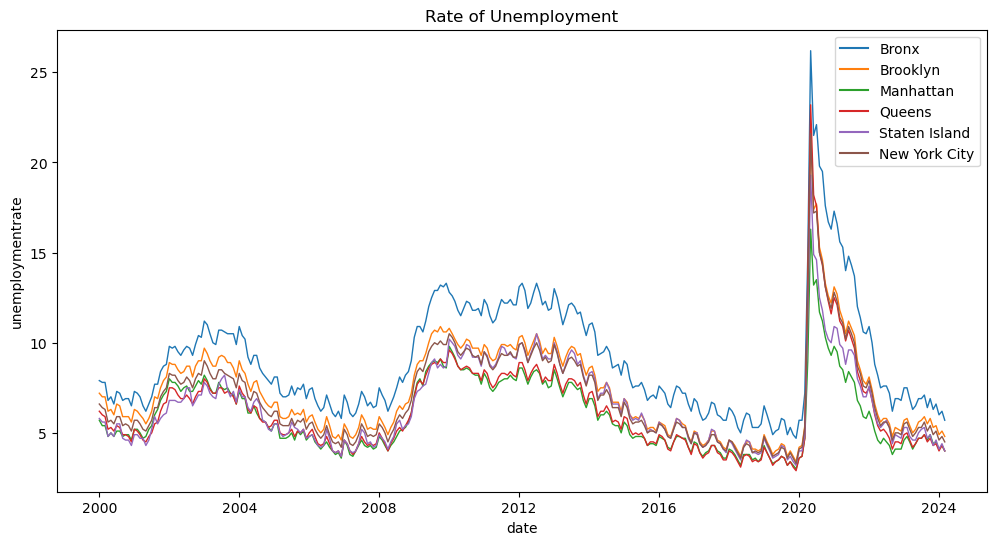

In [44]:
#filtering for starting at 2000
nyc_unemployment_filtered = nyc_unemployment[nyc_unemployment['date'].dt.year >= 2000]

plt.figure(figsize=(12, 6))

# Create the histogram with 'waiting_for_truck_time'
sns.lineplot(x='date',y = 'unemprate', hue='borough', data=nyc_unemployment_filtered, linewidth=1, color='palevioletred')
# Fill the area under the curve with blue color
#plt.fill_between(harrisburg_full['Date '], harrisburg_full['pct_cancelled'], color='palevioletred', alpha=0.3)
# Set labels and title
##plt.xlabel('pct_cancelled')
plt.ylabel('unemploymentrate')
plt.title('Rate of Unemployment')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Uploading Data to Postgres

In [45]:
from sql_functions import get_engine

In [46]:
table_name = 'unemployment_nyc'
schema = 'capstone_crime_nerds' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = get_engine() # assign engine to be able to query against the database
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        nyc_unemployment.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The unemployment_nyc table was imported successfully.


In [47]:
table_name_sql = f'''SELECT count(*) 
                    FROM {schema}.{table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == nyc_unemployment.shape[0]

True

# Police Stations

## Try Nr. 1

In [ ]:
#Inserting Police Stations Data
agencies = pd.read_csv('./data/Agency_Performance_Mapping_NYC.csv')
agencies.head()

In [ ]:
agencies.info()

In [ ]:
agencies.shape

In [ ]:
agencies['Agency'].unique()

In [ ]:
#Cleaning columns - converting to lower case, removing whitespaces from front and end and replacing whitespaces with underscores.
agencies.columns = agencies.columns.str.lower()
agencies.columns = agencies.columns.str.strip()
agencies.columns = agencies.columns.str.replace(" ", "_")
agencies.head()

In [ ]:
nypd = agencies[agencies['agency'] == 'NYPD']
nypd.info()

In [ ]:
nypd.head()

In [ ]:
columns1 = ['jul-10', "aug-10", "sep-10", "oct-10", "nov-10", "dec-10",
           "jan-11", "feb-11", "mar-11", "apr-11", "may-11", "jun-11", "jul-11", "aug-11", "sep-11", "oct-11", "nov-11", "dec-11",
           "jan-12", "feb-12", "mar-12", "apr-12", "may-12", "jun-12", "jul-12", "aug-12", "sep-12", "oct-12", "nov-12", "dec-12",
           "jan-13", "feb-13", "mar-13", "apr-13", "may-13", "jun-13", "jul-13", "aug-13", "sep-13", "oct-13", "nov-13", "dec-13",
           "jan-14", "feb-14", "mar-14", "apr-14", "may-14", "jun-14", "jul-14", "aug-14", "sep-14", "oct-14", "nov-14", "dec-14",
           "jan-15", "feb-15", "mar-15", "apr-15", "may-15", "jun-15", "jul-15", "aug-15", "sep-15", "oct-15", "nov-15", "dec-15",
           "jan-16", "feb-16", "mar-16", "apr-16", "may-16", "jun-16", "jul-16", "aug-16", "sep-16", "oct-16", "nov-16", "dec-16",
           "jan-17", "feb-17", "mar-17", "apr-17", "may-17", "jun-17", "jul-17", "aug-17", "sep-17", "oct-17", "nov-17", "dec-17",
           "jan-18", "feb-18", "mar-18", "apr-18", "may-18", "jun-18", "jul-18", "aug-18", "sep-18", "oct-18", "nov-18", "dec-18",
           "jan-19", "feb-19", "mar-19", "apr-19", "may-19", "jun-19"]
nypd_s = nypd.drop(columns1, axis=1)
nypd_s.head()

In [ ]:
nypd_s['geographic_identifier'].unique()

## Try Nr. 2 - CSV from Website (created on my own)

In [ ]:
police_st = pd.read_csv('./data/NYC_Precicts_per_borough.csv')
police_st.head()

,Borough,Precinct,Adress
0,Manhattan,1st Precinct,16 Ericsson Place
1,Manhattan,5th Precinct,19 Elizabeth Street
2,Manhattan,6th Precinct,233 West 10 Street
3,Manhattan,7th Precinct,19 1/2 Pitt Street
4,Manhattan,9th Precinct,321 East 5 Street


In [ ]:
police_st.columns = police_st.columns.str.lower()
police_st.columns = police_st.columns.str.strip()
police_st.head()

,borough,precinct,adress
0,Manhattan,1st Precinct,16 Ericsson Place
1,Manhattan,5th Precinct,19 Elizabeth Street
2,Manhattan,6th Precinct,233 West 10 Street
3,Manhattan,7th Precinct,19 1/2 Pitt Street
4,Manhattan,9th Precinct,321 East 5 Street


In [ ]:
police_pb = police_st.groupby('borough')['precinct'].count()
police_pb

#.agg({'Precinct':['count']})

borough
Bronx            12
Brooklyn         23
Manhattan        22
Queens           16
Staten Island     4
Name: precinct, dtype: int64

In [ ]:
police_pb.info()

In [ ]:
new_entry_dict = {'New York City': 77}

# Umwandlung des Dictionarys in eine Series
new_entry_series = pd.Series(new_entry_dict, name='borough')

# Konkatenation der ursprünglichen Series mit der neuen Series
police_series = pd.concat([police_pb, new_entry_series])

police_series

Bronx            12
Brooklyn         23
Manhattan        22
Queens           16
Staten Island     4
New York City    77
dtype: int64

In [ ]:
police_df = police_series.reset_index()
police_df.columns = ['borough', 'no_policestation']
police_df

,borough,no_policestation
0,Bronx,12
1,Brooklyn,23
2,Manhattan,22
3,Queens,16
4,Staten Island,4
5,New York City,77


In [ ]:
police_st

# Size per borough and population (2022)

In [ ]:
size = pd.read_csv('./data/Borough_Size.csv')
size.head()

,borough,size_sq_miles,population_2022
0,Brooklyn,69.4,2590516
1,Manhattan,22.7,1596273
2,Bronx,42.2,1379946
3,Queens,108.7,2278029
4,Staten Island,57.5,491133


In [ ]:
size

In [ ]:
size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   borough          6 non-null      object 
 1   size_sq_miles    6 non-null      float64
 2   population_2022  6 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


In [ ]:
size['size_sq_km'] = (size['size_sq_miles']*2.59).round(2)
size

,borough,size_sq_miles,population_2022,size_sq_km
0,Brooklyn,69.4,2590516,179.75
1,Manhattan,22.7,1596273,58.79
2,Bronx,42.2,1379946,109.30
3,Queens,108.7,2278029,281.53
4,Staten Island,57.5,491133,148.92
5,New York City,300.5,8335897,778.30


In [ ]:
police_df

,borough,no_policestation
0,Bronx,12
1,Brooklyn,23
2,Manhattan,22
3,Queens,16
4,Staten Island,4
5,New York City,77


In [ ]:
police_size = size.merge(police_df, how='outer', on = 'borough')
police_size

,borough,size_sq_miles,population_2022,size_sq_km,no_policestation
0,Brooklyn,69.4,2590516,179.75,23
1,Manhattan,22.7,1596273,58.79,22
2,Bronx,42.2,1379946,109.30,12
3,Queens,108.7,2278029,281.53,16
4,Staten Island,57.5,491133,148.92,4
5,New York City,300.5,8335897,778.30,77


In [ ]:
police_size['no_ps_sq_km']= police_size['no_policestation']/police_size['size_sq_km']
police_size

,borough,size_sq_miles,population_2022,size_sq_km,no_policestation,no_ps_sq_km
0,Brooklyn,69.4,2590516,179.75,23,0.127955
1,Manhattan,22.7,1596273,58.79,22,0.374213
2,Bronx,42.2,1379946,109.30,12,0.109790
3,Queens,108.7,2278029,281.53,16,0.056832
4,Staten Island,57.5,491133,148.92,4,0.026860
5,New York City,300.5,8335897,778.30,77,0.098934


In [ ]:
police_size['no_ps_pop']= police_size['no_policestation']/(police_size['population_2022']/100000)
police_size

,borough,size_sq_miles,population_2022,size_sq_km,no_policestation,no_ps_sq_km,no_ps_sq_miles,no_ps_pop
0,Brooklyn,69.4,2590516,179.75,23,0.127955,0.331412,0.887854
1,Manhattan,22.7,1596273,58.79,22,0.374213,0.969163,1.378210
2,Bronx,42.2,1379946,109.30,12,0.109790,0.284360,0.869599
3,Queens,108.7,2278029,281.53,16,0.056832,0.147194,0.702362
4,Staten Island,57.5,491133,148.92,4,0.026860,0.069565,0.814443
5,New York City,300.5,8335897,778.30,77,0.098934,0.256240,0.923716


In [ ]:
police_size['no_ps_sq_miles']= police_size['no_policestation']/(police_size['size_sq_miles'])
police_size

,borough,size_sq_miles,population_2022,size_sq_km,no_policestation,no_ps_sq_km,no_ps_sq_miles
0,Brooklyn,69.4,2590516,179.75,23,0.127955,0.331412
1,Manhattan,22.7,1596273,58.79,22,0.374213,0.969163
2,Bronx,42.2,1379946,109.30,12,0.109790,0.284360
3,Queens,108.7,2278029,281.53,16,0.056832,0.147194
4,Staten Island,57.5,491133,148.92,4,0.026860,0.069565
5,New York City,300.5,8335897,778.30,77,0.098934,0.256240


# Data on Salary of Police Officers etc.

In [ ]:
city_pay = pd.read_csv('./data/Citywide_Payroll_Data_Yearly.csv')
city_pay.head()

#Notes:
#OT = Over Time
#All that is captured, is the employee's final base and gross salary at the end of the fiscal year.  In very limited cases, a check replacement and subsequent refund may reflect both the original check as well as the re-issued check in employee pay totals.  

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_2519/3560317651.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  city_pay = pd.read_csv('./data/Citywide_Payroll_Data_Yearly.csv')


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [ ]:
#Cleaning Column Names
city_pay.columns = city_pay.columns.str.lower()
city_pay.columns = city_pay.columns.str.strip()
city_pay.columns = city_pay.columns.str.replace(" ", "_")
city_pay.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [ ]:
# Dropping Columns, we don't need.

#city_pay.drop(['last_name', 'first_name', 'mid_init'], axis=1, inplace=True)
#city_pay.drop('mid_init', axis=1, inplace = True)
city_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662713 entries, 0 to 5662712
Data columns (total 14 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   fiscal_year                 int64  
 1   payroll_number              float64
 2   agency_name                 object 
 3   agency_start_date           object 
 4   work_location_borough       object 
 5   title_description           object 
 6   leave_status_as_of_june_30  object 
 7   base_salary                 float64
 8   pay_basis                   object 
 9   regular_hours               float64
 10  regular_gross_paid          float64
 11  ot_hours                    float64
 12  total_ot_paid               float64
 13  total_other_pay             float64
dtypes: float64(7), int64(1), object(6)
memory usage: 604.8+ MB


In [ ]:
city_pay['agency_name'].unique()

array(['OFFICE OF EMERGENCY MANAGEMENT', 'OFFICE OF MANAGEMENT & BUDGET',
       'PERSONNEL MONITORS', 'TAX COMMISSION', 'LAW DEPARTMENT',
       'DEPT OF ED PEDAGOGICAL', 'DEPARTMENT OF CITY PLANNING',
       'DEPARTMENT OF INVESTIGATION', 'TEACHERS RETIREMENT SYSTEM',
       'CIVILIAN COMPLAINT REVIEW BD', 'POLICE DEPARTMENT',
       'NYC HOUSING AUTHORITY', 'BOARD OF ELECTION POLL WORKERS',
       'FIRE DEPARTMENT', "NYC DEPT OF VETERANS' SERVICES",
       "ADMIN FOR CHILDREN'S SVCS", 'HRA/DEPT OF SOCIAL SERVICES',
       'DEPT. OF HOMELESS SERVICES', 'DEPARTMENT OF CORRECTION',
       'BOARD OF CORRECTION', 'MAYORS OFFICE OF CONTRACT SVCS',
       'PUBLIC ADVOCATE', 'CITY COUNCIL', 'CITY CLERK',
       'DEPARTMENT FOR THE AGING', 'CULTURAL AFFAIRS',
       'FINANCIAL INFO SVCS AGENCY', 'DEPARTMENT OF JUVENILE JUSTICE',
       'OFF OF PAYROLL ADMINISTRATION', 'INDEPENDENT BUDGET OFFICE',
       'EQUAL EMPLOY PRACTICES COMM', 'CIVIL SERVICE COMMISSION',
       'LANDMARKS PRESERVATION

In [ ]:
# Filtering for police
#'POLICE DEPARTMENT''NYC POLICE PENSION FUND''Police Department'

police_pay = city_pay.loc[city_pay['agency_name'].isin(['POLICE DEPARTMENT', 'NYC POLICE PENSION FUND', 'Police Department'])]
police_pay.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
4789,2020,56.0,POLICE DEPARTMENT,MORALES,JOSE,NaN,12/20/1998,MANHATTAN,SUPERVISOR OF SCHOOL SECURITY,CEASED,57813.0,per Annum,0.00,0.00,0.00,0.00,650000.00
4790,2020,56.0,POLICE DEPARTMENT,BOYNE,DANIEL,G,04/25/2016,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.8,per Day,2080.00,140146.17,1125.25,117728.07,40696.41
4791,2020,56.0,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,141196.0,per Annum,665.18,48008.86,2451.57,162000.47,78132.88
4792,2020,56.0,POLICE DEPARTMENT,MASTRANDE,JAMES,J,12/16/2013,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.8,per Day,2080.00,140146.17,1007.00,103226.97,27980.42
4793,2020,56.0,POLICE DEPARTMENT,AROCA,ALMA,P,07/11/2012,MANHATTAN,POLICE OFFICER,CEASED,85292.0,per Annum,22.87,227914.67,0.00,0.00,30289.83


In [ ]:
police_pay['agency_name'].unique()

array(['POLICE DEPARTMENT', 'NYC POLICE PENSION FUND',
       'Police Department'], dtype=object)

In [ ]:
police_pay[['last_name', 'first_name', 'mid_init']].nunique()

last_name     34767
first_name    18642
mid_init         31
dtype: int64

In [ ]:
unique_values = pd.concat([police_pay['last_name'], police_pay['first_name'], police_pay['mid_init'], police_pay['fiscal_year']]).nunique()

print(f"The number of unique values across 'last_name', 'first_name', and 'mid_init' is: {unique_values}")

The number of unique values across 'last_name', 'first_name', and 'mid_init' is: 51302


In [ ]:
unique_values = pd.concat([police_pay['last_name'], police_pay['first_name'], police_pay['mid_init']]).nunique()

print(f"The number of unique values across 'last_name', 'first_name', and 'mid_init' is: {unique_values}")

The number of unique values across 'last_name', 'first_name', and 'mid_init' is: 51292


In [ ]:
police_pay.reset_index(inplace=True, drop=True)
#police_pay.columns.drop('index')
police_pay

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,56.0,POLICE DEPARTMENT,MORALES,JOSE,NaN,12/20/1998,MANHATTAN,SUPERVISOR OF SCHOOL SECURITY,CEASED,57813.0,per Annum,0.00,0.00,0.00,0.00,650000.00
1,2020,56.0,POLICE DEPARTMENT,BOYNE,DANIEL,G,04/25/2016,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.8,per Day,2080.00,140146.17,1125.25,117728.07,40696.41
2,2020,56.0,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,141196.0,per Annum,665.18,48008.86,2451.57,162000.47,78132.88
3,2020,56.0,POLICE DEPARTMENT,MASTRANDE,JAMES,J,12/16/2013,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.8,per Day,2080.00,140146.17,1007.00,103226.97,27980.42
4,2020,56.0,POLICE DEPARTMENT,AROCA,ALMA,P,07/11/2012,MANHATTAN,POLICE OFFICER,CEASED,85292.0,per Annum,22.87,227914.67,0.00,0.00,30289.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603544,2023,256.0,NYC POLICE PENSION FUND,YASSA,NAGLAA,G,08/29/2022,MANHATTAN,COMPUTER SYSTEMS MANAGER,ACTIVE,151830.0,per Annum,1470.00,117171.69,1.00,78.49,3033.00
603545,2023,256.0,NYC POLICE PENSION FUND,YOUNG,MARY,A,02/17/2005,MANHATTAN,COMMUNITY COORDINATOR,ACTIVE,89110.0,per Annum,1820.00,40874.90,0.00,0.00,3312.45
603546,2023,256.0,NYC POLICE PENSION FUND,YU,PATRICK,NaN,12/03/2018,MANHATTAN,ASSOCIATE RETIREMENT BENEFITS EXAMINER,ACTIVE,68558.0,per Annum,1820.00,68651.40,0.00,0.00,12709.93
603547,2023,256.0,NYC POLICE PENSION FUND,ZAVALA,IVELISSE,NaN,06/14/2004,MANHATTAN,CUSTOMER INFORMATION REPRESENTATIVE MA L 1549,ACTIVE,91622.0,per Annum,1820.00,90137.89,344.75,20875.95,7015.34


In [ ]:
police_pay['leave_status_as_of_june_30'].unique()

array(['CEASED', 'ACTIVE', 'ON LEAVE', 'ON SEPARATION LEAVE', 'SEASONAL'],
      dtype=object)

In [ ]:
police_pay['work_location_borough'].unique()

array(['MANHATTAN', 'BROOKLYN', 'BRONX', 'QUEENS', 'RICHMOND', nan],
      dtype=object)

In [ ]:
police_pay[police_pay['work_location_borough'].isnull()]

,fiscal_year,payroll_number,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
245138,2014,256.0,NYC POLICE PENSION FUND,10/07/1968,NaN,ADMINISTRATIVE ACCOUNTANT,ACTIVE,128511.0,per Annum,1825.00,128158.93,0.00,0.00,0.00
245139,2014,256.0,NYC POLICE PENSION FUND,10/15/1979,NaN,MANAGEMENT AUDITOR,ACTIVE,68092.0,per Annum,1825.00,67905.49,7.00,335.19,8434.91
245140,2014,256.0,NYC POLICE PENSION FUND,01/28/1980,NaN,ASSOCIATE RETIREMENT BENEFITS EXAMINER,ACTIVE,83857.0,per Annum,1744.80,80589.99,0.00,0.00,8540.98
245141,2014,256.0,NYC POLICE PENSION FUND,03/24/1980,NaN,ASSOCIATE RETIREMENT BENEFITS EXAMINER,CEASED,84632.0,per Annum,1465.00,72932.50,0.00,0.00,0.00
245142,2014,256.0,NYC POLICE PENSION FUND,04/07/1980,NaN,ADMINISTRATIVE RETIREMENT BENEFITS SPECIALIST,ACTIVE,119626.0,per Annum,1825.00,117694.58,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300929,2014,NaN,Police Department,07/01/2003,NaN,SERGEANT,ACTIVE,98072.0,per Annum,2085.72,97803.42,336.47,27542.63,19856.16
300930,2014,NaN,Police Department,12/08/1997,NaN,SERGEANT,ACTIVE,98072.0,per Annum,2085.72,97803.42,123.57,10613.47,7632.16
300931,2014,NaN,Police Department,07/01/2004,NaN,POLICE OFFICER,ACTIVE,76488.0,per Annum,2085.72,76278.54,409.42,24585.31,13136.21
300932,2014,NaN,Police Department,10/20/1983,NaN,SUPERVISOR OF RADIO REPAIR OPERATIONS,CEASED,74857.0,per Annum,354.28,15791.65,0.00,0.00,744.18


In [ ]:
no_location = police_pay[police_pay['work_location_borough'].isnull()]
no_location['agency_name'].unique()

array(['NYC POLICE PENSION FUND', 'Police Department'], dtype=object)

In [ ]:
police_pay['title_description'].unique()

array(['SUPERVISOR OF SCHOOL SECURITY', 'STATIONARY ENGINEER',
       'LIEUTENANT D/A SPECIAL ASSIGNMENT', 'POLICE OFFICER',
       'LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD',
       'SENIOR STATIONARY ENGINEER', 'ASSISTANT TO POLICE COMMISSIONOR',
       'CAPTAIN DETAILED AS ASSISTANT CHIEF INSPECTOR',
       'ADMINISTRATIVE PUBLIC INFORMATION SPECIALIST',
       'EXECUTIVE AGENCY COUNSEL', 'DEPUTY COMMISSIONER', 'COMMISSIONER',
       'CAPT DET CHIEF OF DEPARTMENT', 'FIRST DEPUTY COMMISSIONER',
       'CAPTAIN DETAILED AS CHIEF OF PATROL',
       'CAPT DET CHIEF OF THE HOUSING BUREAU',
       'CAPTAIN-MANAGERIAL DETAILS',
       'CAPT DET CHIEF OF THE TRANSIT BUREAU',
       'CAPTAIN-CHIEF OF INTELLIGENCE', 'ADMINISTRATIVE STAFF ANALYST',
       'CAPTAIN DETAILED AS CHIEF OF DETECTIVES',
       'CAPTAIN: CHIEF OF TRANSPORTATION BUREAU',
       'SUPERVISING CHIEF SURGEON', 'DIRECTOR OF SUPPORT SERVICES-PD',
       'CAPTAIN DETAILED AS CHIEF OF CRIMINAL JUSTICE',
       'DIRECTOR OF

In [ ]:
titles = ['OFFICER', 'DETECTIVE', 'SERGEANT', 'LIEUTENANT', 'CAPTAIN', 'DEPUTY', 'INSPECTOR', 'CHIEF']

#Source: https://app.powerbigov.us/view?r=eyJrIjoiZTI4OTRjZTYtNTYwOC00NzcxLThhYTItOTU5NGNkMzIzYjVlIiwidCI6IjJiOWY1N2ViLTc4ZDEtNDZmYi1iZTgzLWEyYWZkZDdjNjA0MyJ9&pageName=ReportSection

In [ ]:
police_officer1 = police_pay[police_pay['title_description'].str.contains('|'.join(titles), case=False)]


# Print the filtered DataFrame
police_officer1


,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
2,2020,56.0,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,141196.0,per Annum,665.18,48008.86,2451.57,162000.47,78132.88
4,2020,56.0,POLICE DEPARTMENT,AROCA,ALMA,P,07/11/2012,MANHATTAN,POLICE OFFICER,CEASED,85292.0,per Annum,22.87,227914.67,0.00,0.00,30289.83
5,2020,56.0,POLICE DEPARTMENT,TABBS,RONALD,G,07/09/2014,MANHATTAN,POLICE OFFICER,ON LEAVE,85292.0,per Annum,1822.85,230597.55,55.27,3071.28,22856.71
7,2020,56.0,POLICE DEPARTMENT,RATTIGAN,ROBERT,J,11/30/1992,MANHATTAN,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,ACTIVE,144726.0,per Annum,2164.17,151499.39,1169.17,73978.54,25678.75
8,2020,56.0,POLICE DEPARTMENT,ZACARESE,RICHARD,L,07/07/1999,BROOKLYN,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,ACTIVE,144726.0,per Annum,2167.50,148716.50,947.33,82384.84,18313.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603359,2023,56.0,POLICE DEPARTMENT,ZWILLING,CHARLES,J,07/01/2004,MANHATTAN,SERGEANT-,ACTIVE,118056.0,per Annum,2080.00,117732.67,442.17,43225.58,25089.47
603361,2023,56.0,POLICE DEPARTMENT,ZYTKOWICZ,MICHAEL,G,07/10/2006,MANHATTAN,POLICE OFFICER,ACTIVE,101590.0,per Annum,2080.00,85058.22,459.58,33282.43,24470.84
603389,2023,256.0,NYC POLICE PENSION FUND,COMO,JOHN,J,08/22/2011,MANHATTAN,DEPUTY DIRECTOR,ACTIVE,222759.0,per Annum,1820.00,222148.68,0.00,0.00,0.00
603513,2023,256.0,NYC POLICE PENSION FUND,SENS CASTET,ROBERT,NaN,10/21/2002,MANHATTAN,DEPUTY DIRECTOR,ACTIVE,233089.0,per Annum,1820.00,232450.40,0.00,0.00,0.00


In [ ]:
police_officer1['title_description'].unique()

array(['LIEUTENANT D/A SPECIAL ASSIGNMENT', 'POLICE OFFICER',
       'LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD',
       'CAPTAIN DETAILED AS ASSISTANT CHIEF INSPECTOR',
       'DEPUTY COMMISSIONER', 'CAPT DET CHIEF OF DEPARTMENT',
       'FIRST DEPUTY COMMISSIONER', 'CAPTAIN DETAILED AS CHIEF OF PATROL',
       'CAPT DET CHIEF OF THE HOUSING BUREAU',
       'CAPTAIN-MANAGERIAL DETAILS',
       'CAPT DET CHIEF OF THE TRANSIT BUREAU',
       'CAPTAIN-CHIEF OF INTELLIGENCE',
       'CAPTAIN DETAILED AS CHIEF OF DETECTIVES',
       'CAPTAIN: CHIEF OF TRANSPORTATION BUREAU',
       'SUPERVISING CHIEF SURGEON',
       'CAPTAIN DETAILED AS CHIEF OF CRIMINAL JUSTICE',
       'CAPTAIN DETAILED AS CHIEF OF TRAINING', 'CAPTAIN-CHIEF OF STAFF',
       'CAPTAIN DETAILED AS CHIEF OF SPECIAL OPERATIONS',
       'CAPTAIN DETAILED AS CHIEF OF CRIME CONTROL STRATEGIES',
       'CAPTAIN DETAILED AS CHIEF OF PERSONNEL',
       'CAPTAIN-CHIEF OF COMMUNITY AFFAIRS',
       'CAPTAIN D/A DEPUTY CHIEF INSPE

In [92]:
#Eliminating every "chief" and so on, that is not actively on the streets:

officers = ['LIEUTENANT D/A SPECIAL ASSIGNMENT', 'POLICE OFFICER',
       'LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD',
       'CAPTAIN DETAILED AS ASSISTANT CHIEF INSPECTOR',
       'DEPUTY COMMISSIONER', 'CAPT DET CHIEF OF DEPARTMENT',
       'FIRST DEPUTY COMMISSIONER', 'CAPTAIN DETAILED AS CHIEF OF PATROL',
       'CAPT DET CHIEF OF THE HOUSING BUREAU',
       'CAPTAIN-MANAGERIAL DETAILS',
       'CAPT DET CHIEF OF THE TRANSIT BUREAU',
       'CAPTAIN-CHIEF OF INTELLIGENCE',
       'CAPTAIN DETAILED AS CHIEF OF DETECTIVES',
       'CAPTAIN: CHIEF OF TRANSPORTATION BUREAU',
       'CAPTAIN DETAILED AS CHIEF OF CRIMINAL JUSTICE',
       'CAPTAIN DETAILED AS CHIEF OF TRAINING', 
       'CAPTAIN DETAILED AS CHIEF OF SPECIAL OPERATIONS',
       'CAPTAIN DETAILED AS CHIEF OF CRIME CONTROL STRATEGIES',
       'CAPTAIN-CHIEF OF COMMUNITY AFFAIRS',
       'CAPTAIN D/A DEPUTY CHIEF INSPECTOR', 'LIEUTENANT',
       'CAPTAIN D/A INSPECTOR', 'POLICE OFFICER D/A DETECTIVE 1ST GR',
       'CAPTAIN CHIEF OF COUNTERTERRORISM',
       'SERGEANT-D/A SUPERVISOR DETECTIVE SQUAD', 'CAPTAIN',
       'CAPTAIN D/A DEPUTY INSPECTOR',
       'POLICE OFFICER D/A DETECTIVE 2ND GR',
       'SERGEANT-D/A SPECIAL ASSIGNMENT', 'SERGEANT-',
       'AGENCY CHIEF CONTRACTING OFFICER',
       'CAPTAIN DETAILED AS CHIEF OF STRATEGIC INITIATIVES',
       'ASSISTANT DEPUTY COMMISSIONER',
       'SPECIAL OFFICER', 'DEPUTY DIRECTOR', 'SERGEANT',
       'CAPTAIN DETAILED AS CHIEF OF RISK MANAGEMENT',
       'CAPTAIN DETAILED AS CHIEF OF OPERATIONS',
       'CAPTAIN DETAILED AS CHIEF OF INTERAGENCY OPERATIONS',
       'SERGEANT D/A SPECIAL ASSIGNMENT',
       'SERGEANT D/A SUPERVISOR DETECTIVE SQUAD',
       'POLICE OFFICER, SPECIAL ASSIGNMENT',
       'CAPT DET CHIEF OF INTERNAL AFFAIRS'
       'CAPTAIN DETAILED AS CHIEF OF ORGANIZED CRIME CONTROL',
       'SERGEANTD/A SUPERVISOR DETECTIVE SQUAD',
       'SERGEANTD/A SPECIAL ASSIGNMENT', 
       'CAPTAIN DETAILED AS ASSISTANT CHIEF', 'CAPTAIN D/A DEPUTY CHIEF']

In [96]:
police_officer2 = police_officer1.loc[police_officer1['title_description'].isin(officers)]
police_officer2

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
2,2020,56.0,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,141196.0,per Annum,665.18,48008.86,2451.57,162000.47,78132.88
4,2020,56.0,POLICE DEPARTMENT,AROCA,ALMA,P,07/11/2012,MANHATTAN,POLICE OFFICER,CEASED,85292.0,per Annum,22.87,227914.67,0.00,0.00,30289.83
5,2020,56.0,POLICE DEPARTMENT,TABBS,RONALD,G,07/09/2014,MANHATTAN,POLICE OFFICER,ON LEAVE,85292.0,per Annum,1822.85,230597.55,55.27,3071.28,22856.71
7,2020,56.0,POLICE DEPARTMENT,RATTIGAN,ROBERT,J,11/30/1992,MANHATTAN,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,ACTIVE,144726.0,per Annum,2164.17,151499.39,1169.17,73978.54,25678.75
8,2020,56.0,POLICE DEPARTMENT,ZACARESE,RICHARD,L,07/07/1999,BROOKLYN,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,ACTIVE,144726.0,per Annum,2167.50,148716.50,947.33,82384.84,18313.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603359,2023,56.0,POLICE DEPARTMENT,ZWILLING,CHARLES,J,07/01/2004,MANHATTAN,SERGEANT-,ACTIVE,118056.0,per Annum,2080.00,117732.67,442.17,43225.58,25089.47
603361,2023,56.0,POLICE DEPARTMENT,ZYTKOWICZ,MICHAEL,G,07/10/2006,MANHATTAN,POLICE OFFICER,ACTIVE,101590.0,per Annum,2080.00,85058.22,459.58,33282.43,24470.84
603389,2023,256.0,NYC POLICE PENSION FUND,COMO,JOHN,J,08/22/2011,MANHATTAN,DEPUTY DIRECTOR,ACTIVE,222759.0,per Annum,1820.00,222148.68,0.00,0.00,0.00
603513,2023,256.0,NYC POLICE PENSION FUND,SENS CASTET,ROBERT,NaN,10/21/2002,MANHATTAN,DEPUTY DIRECTOR,ACTIVE,233089.0,per Annum,1820.00,232450.40,0.00,0.00,0.00


In [97]:
police_officer2['leave_status_as_of_june_30'].unique()

array(['CEASED', 'ON LEAVE', 'ACTIVE', 'ON SEPARATION LEAVE'],
      dtype=object)

In [99]:
police_officer = police_officer2.loc[police_officer2['leave_status_as_of_june_30'].isin(['ON LEAVE', 'ACTIVE'])]
police_officer

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
5,2020,56.0,POLICE DEPARTMENT,TABBS,RONALD,G,07/09/2014,MANHATTAN,POLICE OFFICER,ON LEAVE,85292.0,per Annum,1822.85,230597.55,55.27,3071.28,22856.71
7,2020,56.0,POLICE DEPARTMENT,RATTIGAN,ROBERT,J,11/30/1992,MANHATTAN,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,ACTIVE,144726.0,per Annum,2164.17,151499.39,1169.17,73978.54,25678.75
8,2020,56.0,POLICE DEPARTMENT,ZACARESE,RICHARD,L,07/07/1999,BROOKLYN,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,ACTIVE,144726.0,per Annum,2167.50,148716.50,947.33,82384.84,18313.89
11,2020,56.0,POLICE DEPARTMENT,TOBIN,THERESA,C,07/25/1983,MANHATTAN,CAPTAIN DETAILED AS ASSISTANT CHIEF INSPECTOR,ACTIVE,240511.0,per Annum,2080.00,233808.14,135.00,5143.72,6416.82
13,2020,56.0,POLICE DEPARTMENT,CAICEDO,JERRY,NaN,04/24/1990,BRONX,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,ACTIVE,144726.0,per Annum,2122.08,148085.79,1101.92,67767.76,28356.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603359,2023,56.0,POLICE DEPARTMENT,ZWILLING,CHARLES,J,07/01/2004,MANHATTAN,SERGEANT-,ACTIVE,118056.0,per Annum,2080.00,117732.67,442.17,43225.58,25089.47
603361,2023,56.0,POLICE DEPARTMENT,ZYTKOWICZ,MICHAEL,G,07/10/2006,MANHATTAN,POLICE OFFICER,ACTIVE,101590.0,per Annum,2080.00,85058.22,459.58,33282.43,24470.84
603389,2023,256.0,NYC POLICE PENSION FUND,COMO,JOHN,J,08/22/2011,MANHATTAN,DEPUTY DIRECTOR,ACTIVE,222759.0,per Annum,1820.00,222148.68,0.00,0.00,0.00
603513,2023,256.0,NYC POLICE PENSION FUND,SENS CASTET,ROBERT,NaN,10/21/2002,MANHATTAN,DEPUTY DIRECTOR,ACTIVE,233089.0,per Annum,1820.00,232450.40,0.00,0.00,0.00


In [100]:
police_officer['pay_basis'].value_counts()

pay_basis
per Annum    311423
Name: count, dtype: int64

In [103]:
police_officer.drop('pay_basis', axis=1, inplace=True)
police_officer


/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_2519/619467225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police_officer.drop('pay_basis', axis=1, inplace=True)


,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
5,2020,56.0,POLICE DEPARTMENT,TABBS,RONALD,G,07/09/2014,MANHATTAN,POLICE OFFICER,ON LEAVE,85292.0,1822.85,230597.55,55.27,3071.28,22856.71
7,2020,56.0,POLICE DEPARTMENT,RATTIGAN,ROBERT,J,11/30/1992,MANHATTAN,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,ACTIVE,144726.0,2164.17,151499.39,1169.17,73978.54,25678.75
8,2020,56.0,POLICE DEPARTMENT,ZACARESE,RICHARD,L,07/07/1999,BROOKLYN,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,ACTIVE,144726.0,2167.50,148716.50,947.33,82384.84,18313.89
11,2020,56.0,POLICE DEPARTMENT,TOBIN,THERESA,C,07/25/1983,MANHATTAN,CAPTAIN DETAILED AS ASSISTANT CHIEF INSPECTOR,ACTIVE,240511.0,2080.00,233808.14,135.00,5143.72,6416.82
13,2020,56.0,POLICE DEPARTMENT,CAICEDO,JERRY,NaN,04/24/1990,BRONX,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,ACTIVE,144726.0,2122.08,148085.79,1101.92,67767.76,28356.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603359,2023,56.0,POLICE DEPARTMENT,ZWILLING,CHARLES,J,07/01/2004,MANHATTAN,SERGEANT-,ACTIVE,118056.0,2080.00,117732.67,442.17,43225.58,25089.47
603361,2023,56.0,POLICE DEPARTMENT,ZYTKOWICZ,MICHAEL,G,07/10/2006,MANHATTAN,POLICE OFFICER,ACTIVE,101590.0,2080.00,85058.22,459.58,33282.43,24470.84
603389,2023,256.0,NYC POLICE PENSION FUND,COMO,JOHN,J,08/22/2011,MANHATTAN,DEPUTY DIRECTOR,ACTIVE,222759.0,1820.00,222148.68,0.00,0.00,0.00
603513,2023,256.0,NYC POLICE PENSION FUND,SENS CASTET,ROBERT,NaN,10/21/2002,MANHATTAN,DEPUTY DIRECTOR,ACTIVE,233089.0,1820.00,232450.40,0.00,0.00,0.00


## Putting Police Officer Data on Postgres

In [104]:
table_name = 'police_salary_nyc'
schema = 'capstone_crime_nerds' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = get_engine() # assign engine to be able to query against the database
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        police_officer.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The police_salary_nyc table was imported successfully.


In [105]:
table_name_sql = f'''SELECT count(*) 
                    FROM {schema}.{table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == police_officer.shape[0]

True